# Supervised Learning Module Project

### Submitted by Faraz Sharique Ali

### PART A

In [1]:
#Loading the necessary libraries for solving the problems at hand
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### DATA UNDERSTANDING

In [2]:
#Reading all the 3 dataframe
df1 = pd.read_csv("Normal.csv")
df2 = pd.read_csv("Type_H.csv")
df3 = pd.read_csv("Type_S.csv")

In [3]:
#Printing the shape and columns of all the 3 dataframes
print(df1.shape, df1.columns)
print(df2.shape, df2.columns)
print(df3.shape, df3.columns)

(100, 7) Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
(60, 7) Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
(150, 7) Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [4]:
#Comparing columns of df1 with df2
df1.columns == df2.columns

array([ True,  True,  True,  True,  True,  True,  True])

In [5]:
#Comparing columns of df2 with df3
df2.columns == df3.columns

array([ True,  True,  True,  True,  True,  True,  True])

In [6]:
#Comparing columns of df1 with df3
df1.columns == df3.columns

array([ True,  True,  True,  True,  True,  True,  True])

#### Observation- From the above comparision between all the 3 DFs, we can conclude that all the dataframes have the same column name with same order.


In [7]:
#Checking first 5 columns of df1
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [8]:
#Checking first 5 columns of df2
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [9]:
#Checking first 5 columns of df3
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [10]:
#Checking data types of df1
df1.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [11]:
#Checking data types of df2
df2.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [12]:
#Checking data types of df3
df3.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

#### Observation - All the 6 features for each dataframe are float type and target variable (Class) is categorical type.

In [13]:
#Checking distribution of class variable for df1
df1['Class'].value_counts()

Class
Normal    73
Nrmal     27
Name: count, dtype: int64

#### Observation - In df1, class variable has two categories- Normal and Nrmal. But both are same categories, so we need to clean it up by replacing Nrmal with Normal.

In [14]:
#Checking distribution of class variable for df2
df2['Class'].value_counts()

Class
Type_H    37
type_h    23
Name: count, dtype: int64

#### Observation - In df2, class variable has two categories- Type_H and type_h. But both are same categories, so we need to clean it up by replacing type_h with Type_H.

In [15]:
#Checking distribution of class variable for df3
df3['Class'].value_counts()

Class
Type_S    133
tp_s       17
Name: count, dtype: int64

#### In df3, class variable has two categories- Type_S and tp_s. But both are same categories, so we need to clean it up by replacing tp_s with Type_S.

### DATA PREPARATION AND EXPLORATION

In [16]:
#Unify the variations in the Class variable for each DF
df1['Class']=df1['Class'].replace('Nrmal','Normal')
df2['Class']=df2['Class'].replace('type_h','Type_H')
df3['Class']=df3['Class'].replace('tp_s','Type_S')

In [17]:
#Combining all the 3 dataframes
df_combine = pd.concat([df1,df2,df3])

In [18]:
#Checking the shape of new dataframe
df_combine.shape

(310, 7)

#### Observation - Expected Output shape = (310,7) - COMPLETED

In [19]:
#Checking the null values in each columns
df_combine.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

#### Observation - There are no null values in the combined dataframe in any of the columns

In [20]:
#Printing 5 random samples from df
for _ in range(5):
  print(df_combine.sample())

     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
147    74.094731  18.823727  76.032156  55.271004  128.405731  73.388216   

      Class  
147  Type_S  
     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
125    91.468741  24.508177  84.620272  66.960564  117.307897  52.623047   

      Class  
125  Type_S  
    P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
16    86.753609  36.043016  69.221045  50.710593  139.414504  110.860782   

     Class  
16  Type_S  
    P_incidence     P_tilt  L_angle    S_slope    P_radius   S_Degree   Class
60    54.741775  12.095072     41.0  42.646703  117.643219  40.382327  Type_S
    P_incidence    P_tilt    L_angle    S_slope   P_radius  S_Degree   Class
57    52.862214  9.410372  46.988052  43.451842  123.09124  1.856659  Normal


In [21]:
for _ in range(5):
  print(df_combine.sample(n=3))  #print 3 random rows for each sample

    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
31    46.390260  11.079047  32.136553  35.311213   98.774546   6.386832   
0     74.377678  32.053104  78.772013  42.324573  143.560690  56.125906   
38    77.655119  22.432950  93.892779  55.222169  123.055707  61.211187   

     Class  
31  Type_H  
0   Type_S  
38  Type_S  
    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
20    77.106571  30.469994  69.480628  46.636577  112.151600  70.759083   
58    57.145851  16.489091  42.842148  40.656760  113.806178   5.015186   
55    48.170746   9.594217  39.710920  38.576530  135.623310   5.360051   

     Class  
20  Type_S  
58  Normal  
55  Normal  
    P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
34    63.026300  27.336240  51.605017  35.690060  114.506608  7.439870  Normal
6     53.432928  15.864336  37.165934  37.568592  120.567523  5.988551  Type_H
37    49.828135  16.736435  28.000000  33.091700  121.435

In [22]:
#Calculating featurewise percentage of null values in case there are any null values
for i in df_combine.columns:
    print("Percentage of null values in", i,"is", df_combine[i].isnull().sum()/len(df_combine)*100)

Percentage of null values in P_incidence is 0.0
Percentage of null values in P_tilt is 0.0
Percentage of null values in L_angle is 0.0
Percentage of null values in S_slope is 0.0
Percentage of null values in P_radius is 0.0
Percentage of null values in S_Degree is 0.0
Percentage of null values in Class is 0.0


In [23]:
#Checking 5 point summary of the dataframe
df_combine.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


### DATA ANALYSIS

In [24]:
#Calculating correlatiion between all features
df_combine.corr(numeric_only=True)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


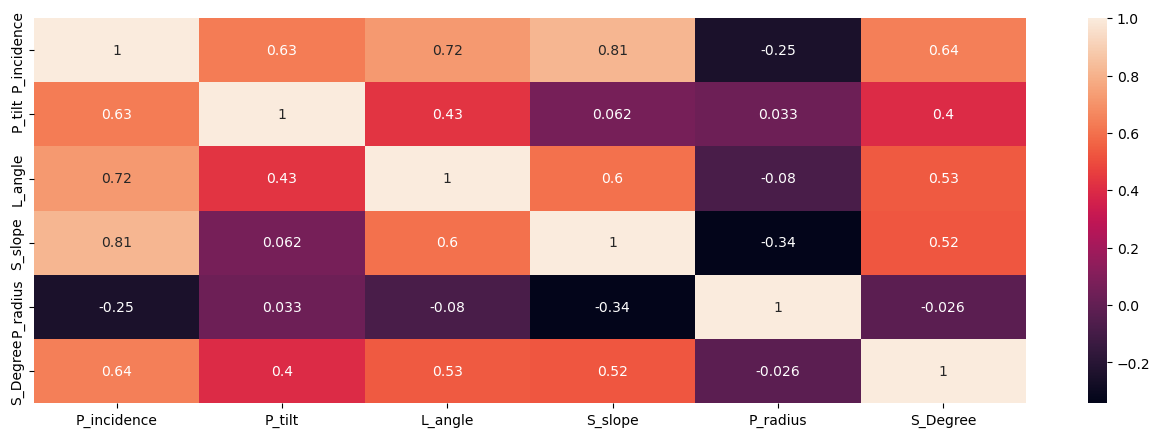

In [25]:
#Heatmap for correlation of all the features
correlation_matrix = df_combine.corr(numeric_only=True)
plt.figure(figsize=(16, 5))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#### Observations: 

##### There is a positive correlation between P_incidence and L_angle with correlation value 0.72, P_incidence and S_slope with correlation value 0.81.

##### There is a moderate positive correlation between P_incidence and P_tilt, P_incidence and S_Degree, L_angle and S_slope, L_angle and S_Degree, S_slope and S_Degree.

##### There is a low negative correlation between P_radius and S_Degree with correlation value 0.026.

##### There is a low positive correlation between P_tilt and L_angle, P_tilt and S_slope, P_tilt and P_radius, P_tilt S_Degree.

/Users/farazali/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


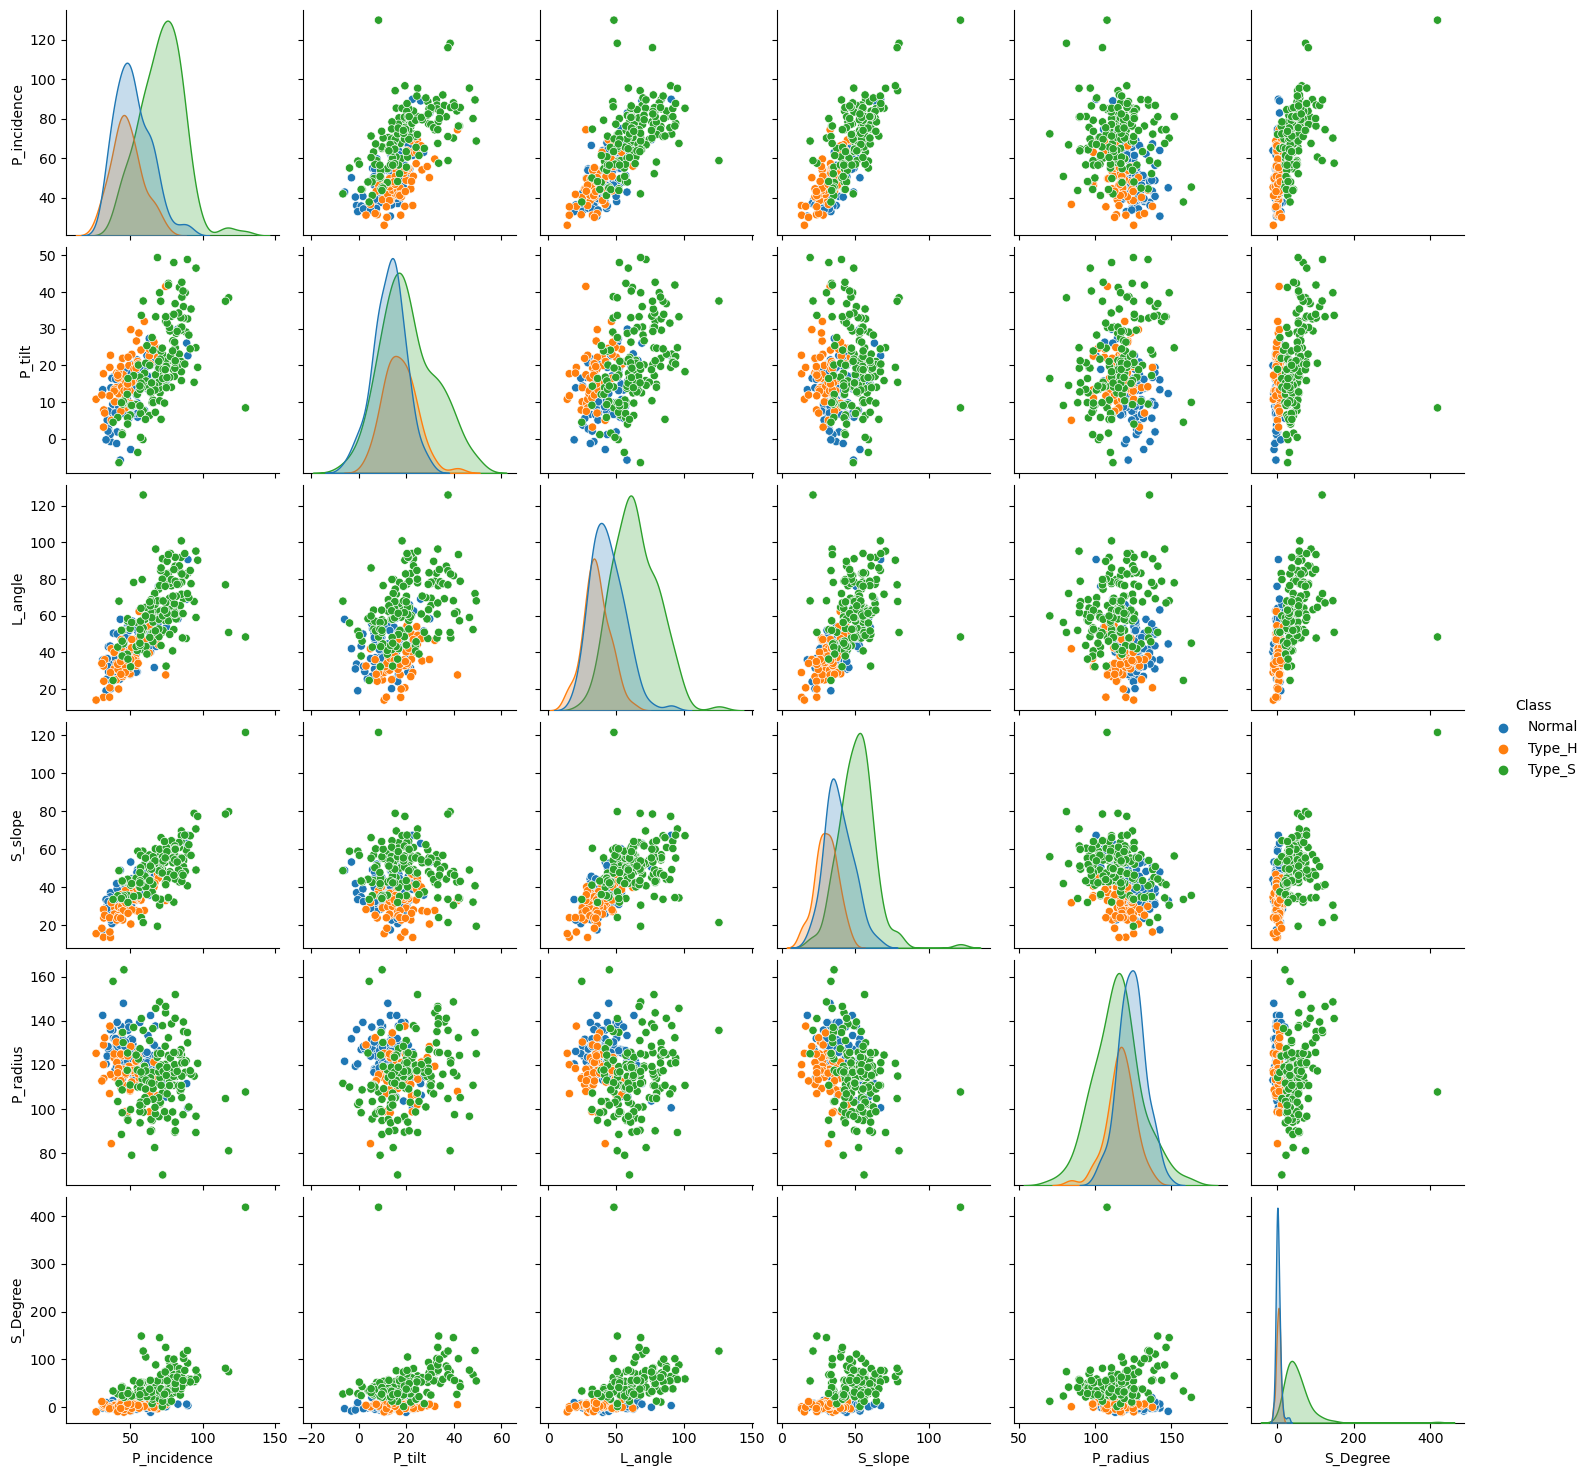

In [26]:
#Pairplot of variables distinguish by class
sns.pairplot(df_combine,hue='Class')

#### Observation - For Type_S category, there are high peak for each of the variable, so there are chances of outliers in this category.

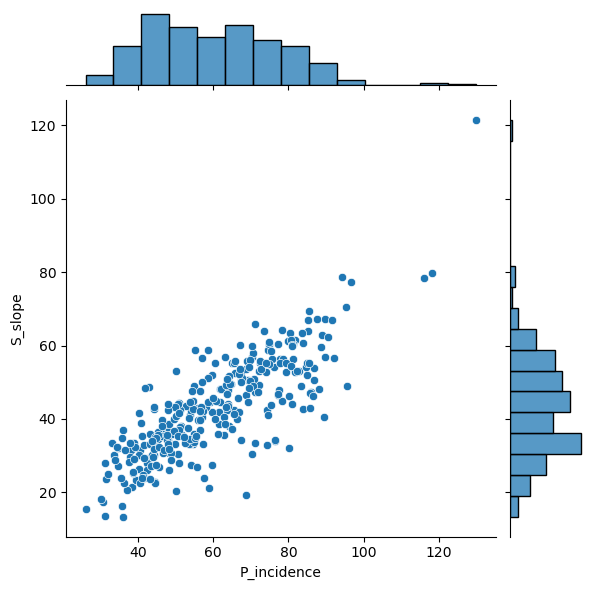

In [27]:
#Joint plot between S_slope and P_incidence
sns.jointplot(x=df_combine['P_incidence'],y=df_combine['S_slope'],data=df_combine)

#### Observations:
##### Most of the values of S_slope is distributed between 20 and 60. 
##### For P_incidence, most of the values distributed between 20 to 100.
##### There is a positive correlation between S_slope and P_incidence.

<Figure size 2000x1000 with 0 Axes>

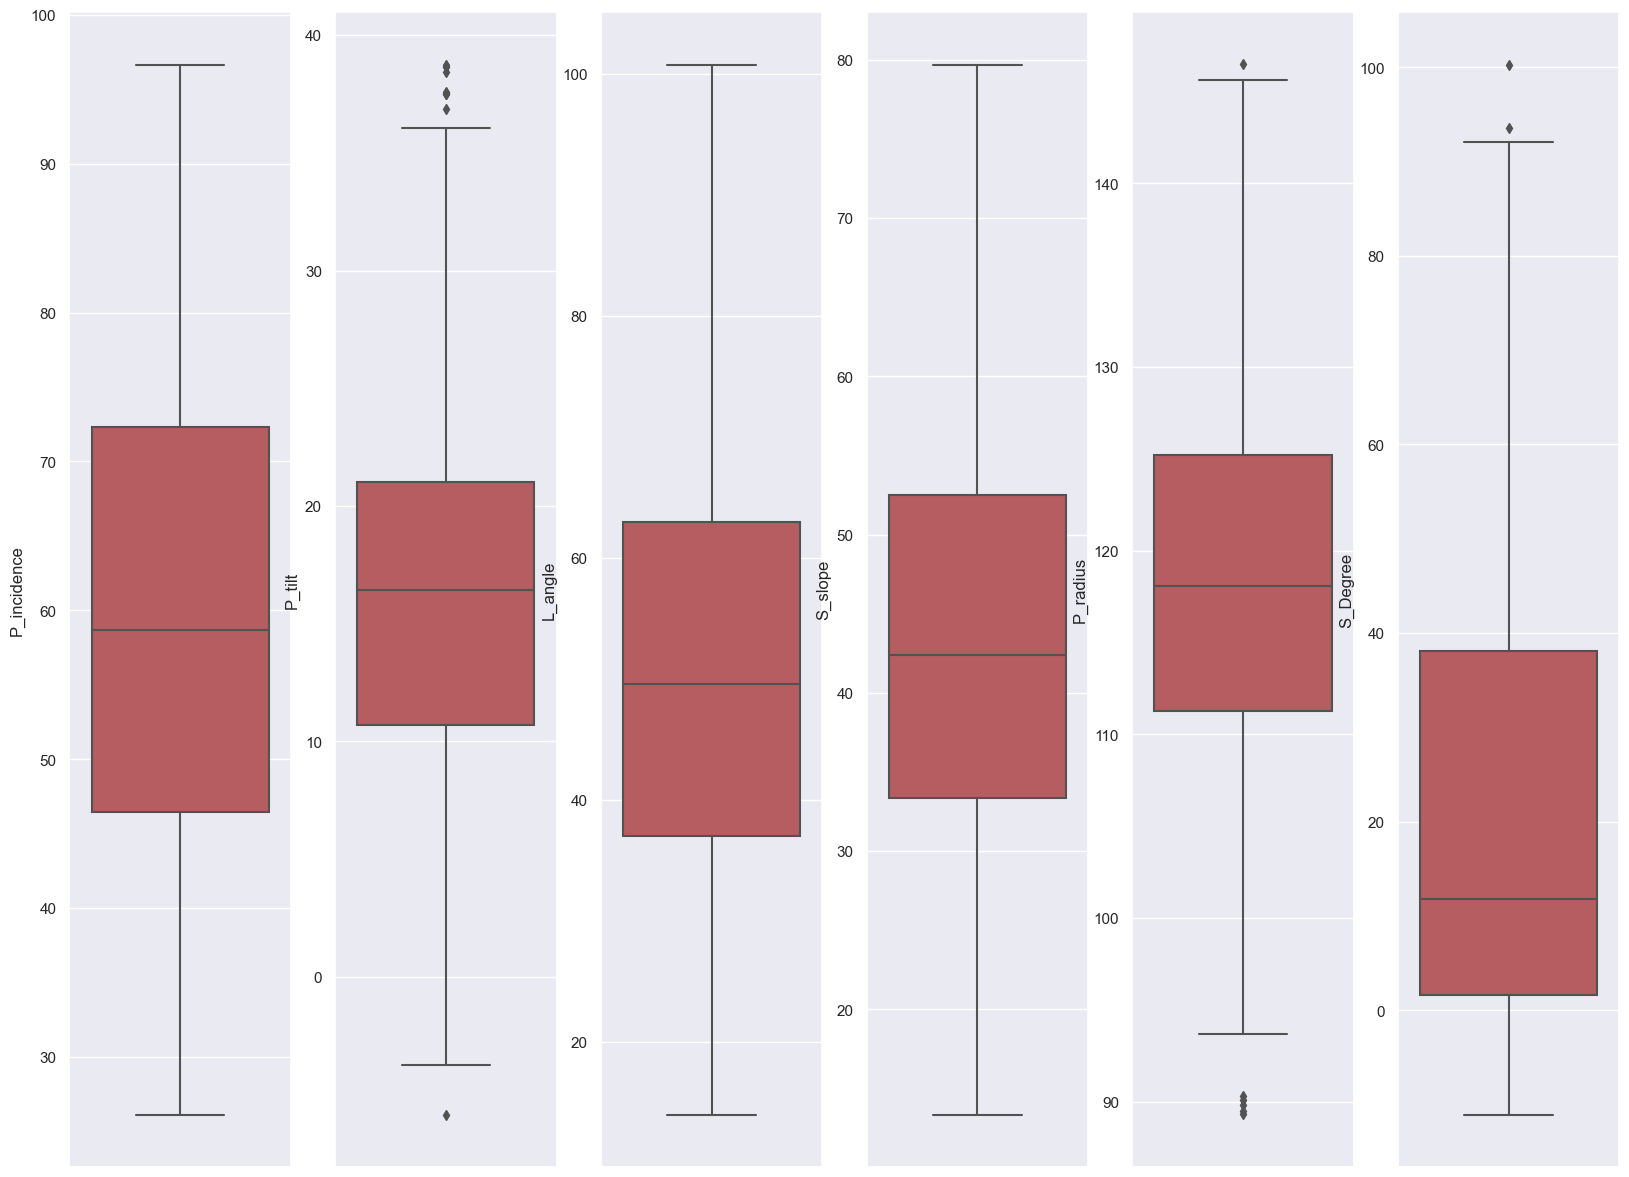

In [84]:
#Boxplot to check the distribution of the feature and detect outlier
columns_to_plot = ['P_incidence','P_tilt' ,'L_angle','S_slope','P_radius','S_Degree']
plt.figure(figsize=(20,10))
fig, axes = plt.subplots(ncols=len(columns_to_plot))
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(y=df_combine[column], ax=axis, color="r") 
sns.set(rc={'figure.figsize':(20,10)})
plt.show()

#### Observation - There are so many outliers in each feature of the dataset, so before developing the machine learning model we have to treat the outlier, otherwise outlier may impact the performance of the model.

In [85]:
#Calculating the number of outlier in each feature of the dataset
des = df_combine.describe()
for col, j in zip(des.columns, np.arange(6)):
    q1 = des.iloc[4,j]
    q3 = des.iloc[6,j]
    iqr = q3-q1
    upper_fence = q3 + 1.5*iqr
    lower_fence = q1 -1.5*iqr
    print("Number of outlier in", col ,"feature is", len(df_combine[col][(df_combine[col]>upper_fence) | (df_combine[col]<lower_fence)]))

Number of outlier in P_incidence feature is 0
Number of outlier in P_tilt feature is 8
Number of outlier in L_angle feature is 0
Number of outlier in S_slope feature is 0
Number of outlier in P_radius feature is 6
Number of outlier in S_Degree feature is 2


In [86]:
#Imputing outliers with mean value
des = df_combine.describe()
columns=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for col, j in zip(columns, np.arange(6)):
    q1 = des.iloc[4,j]
    q3 = des.iloc[6,j]
    iqr = q3-q1
    upper_fence = q3 + 1.5*iqr
    lower_fence = q1 -1.5*iqr
    df_include = df_combine.loc[(df_combine[col] >= lower_fence) & (df_combine[col] <= upper_fence)]
    mean = df_include[col].mean()
    df_combine[col]=np.where(df_combine[col]>upper_fence,mean,df_combine[col])
    df_combine[col]=np.where(df_combine[col] < lower_fence, mean,df_combine[col])
    print("Number of outlier after imputing outlier with mean in", col ,"feature is", len(df_combine[col][(df_combine[col]>upper_fence) | (df_combine[col]<lower_fence)]))

Number of outlier after imputing outlier with mean in P_incidence feature is 0
Number of outlier after imputing outlier with mean in P_tilt feature is 0
Number of outlier after imputing outlier with mean in L_angle feature is 0
Number of outlier after imputing outlier with mean in S_slope feature is 0
Number of outlier after imputing outlier with mean in P_radius feature is 0
Number of outlier after imputing outlier with mean in S_Degree feature is 0


#### Observation - now we can see that there are no outliers in the dataset.

### MODEL BULDING

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
LE = LabelEncoder()

In [132]:
df_combine['Class']= LE.fit_transform(df_combine['Class'])

In [133]:
df_combine['Class'].value_counts()

Class
2    150
0    100
1     60
Name: count, dtype: int64

#### Observation - 

##### Type_S = 2
##### Type_H = 1
##### Normal = 0

In [134]:
#Split the data into X and Y
X = df_combine.drop('Class', axis=1)
Y = df_combine["Class"]

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [136]:
#Splitting the data into train and test in 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [137]:
import bz2,pickle
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = bz2.BZ2File('standardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [138]:
X_train_scaled, X_test_scaled = scaler_standard(X_train,X_test)

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
#Developing the model
knn_model = KNeighborsClassifier()

In [141]:
#Train the model
knn_model.fit(X_train_scaled,Y_train)

KNeighborsClassifier()

In [142]:
Y_train_pred = knn_model.predict(X_train_scaled)

In [143]:
#Checking the accuracy of training dataset
knn_model.score(X_train_scaled, Y_train)

0.8669354838709677

#### Observation - Accuracy of training dataset is 86.69%

In [144]:
#Predict the class for x_test data
Y_test_pred = knn_model.predict(X_test_scaled)

In [145]:
#Checking the accuracy of testing data
knn_model.score(X_test_scaled, Y_test)

0.8387096774193549

#### Observation - 
##### Accuracy of testing dataset is 83.87%.
##### Since accuracy of training dataset is higher than testing dataset, which results in overfitting of the model.

In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
#Printing confusion matrix for training dataset
con_train = confusion_matrix(Y_train,Y_train_pred)
con_train

array([[ 72,   5,   4],
       [ 15,  32,   0],
       [  6,   3, 111]])

In [148]:
#Creating dataframe for confusion matrix of training dataset
con_df = pd.DataFrame(con_train, index=['Normal','Type_H','Type_S'],columns=['Pred_Normal','Pred_Type_H','Pred_Type_S'])
con_df

,Pred_Normal,Pred_Type_H,Pred_Type_S
Normal,72,5,4
Type_H,15,32,0
Type_S,6,3,111


<Axes: >

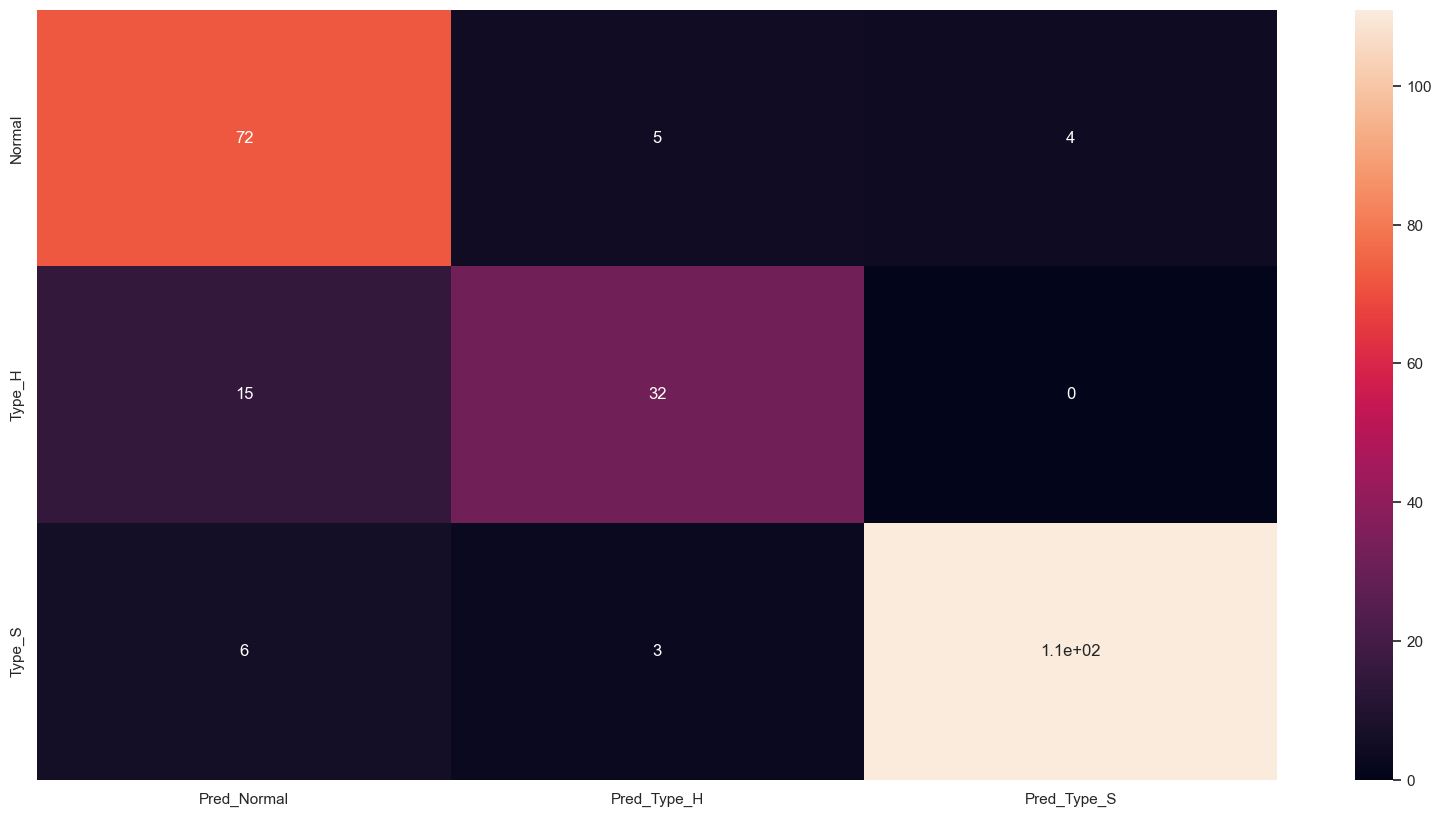

In [149]:
#Plotting heatmap of confusion matrix
sns.heatmap(con_df,annot=True)

#### Observations - 

##### For Normal class, 72 values which are actually Normal are predicted as Normal.
##### For Type_H class, 32 values which are actually Type_H are predicted as Type_H.
##### For Type_S class, 106 values which are actually Type_S are predicted as Type_S.

In [150]:
from sklearn.metrics import classification_report

In [151]:
#Printing the classification report for training dataset
class_report = classification_report(Y_train, Y_train_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        81
           1       0.80      0.68      0.74        47
           2       0.97      0.93      0.94       120

    accuracy                           0.87       248
   macro avg       0.85      0.83      0.84       248
weighted avg       0.87      0.87      0.87       248



In [152]:
#Printing confusion matrix for testing dataset
con_test = confusion_matrix(Y_test,Y_test_pred)
con_train

array([[ 72,   5,   4],
       [ 15,  32,   0],
       [  6,   3, 111]])

In [153]:
#Creating dataframe for confusion matrix of testing dataset
con_test_df = pd.DataFrame(con_test, index=['Normal','Type_H','Type_S'],columns=['Pred_Normal','Pred_Type_H','Pred_Type_S'])
con_test_df

,Pred_Normal,Pred_Type_H,Pred_Type_S
Normal,15,3,1
Type_H,6,7,0
Type_S,0,0,30


<Axes: >

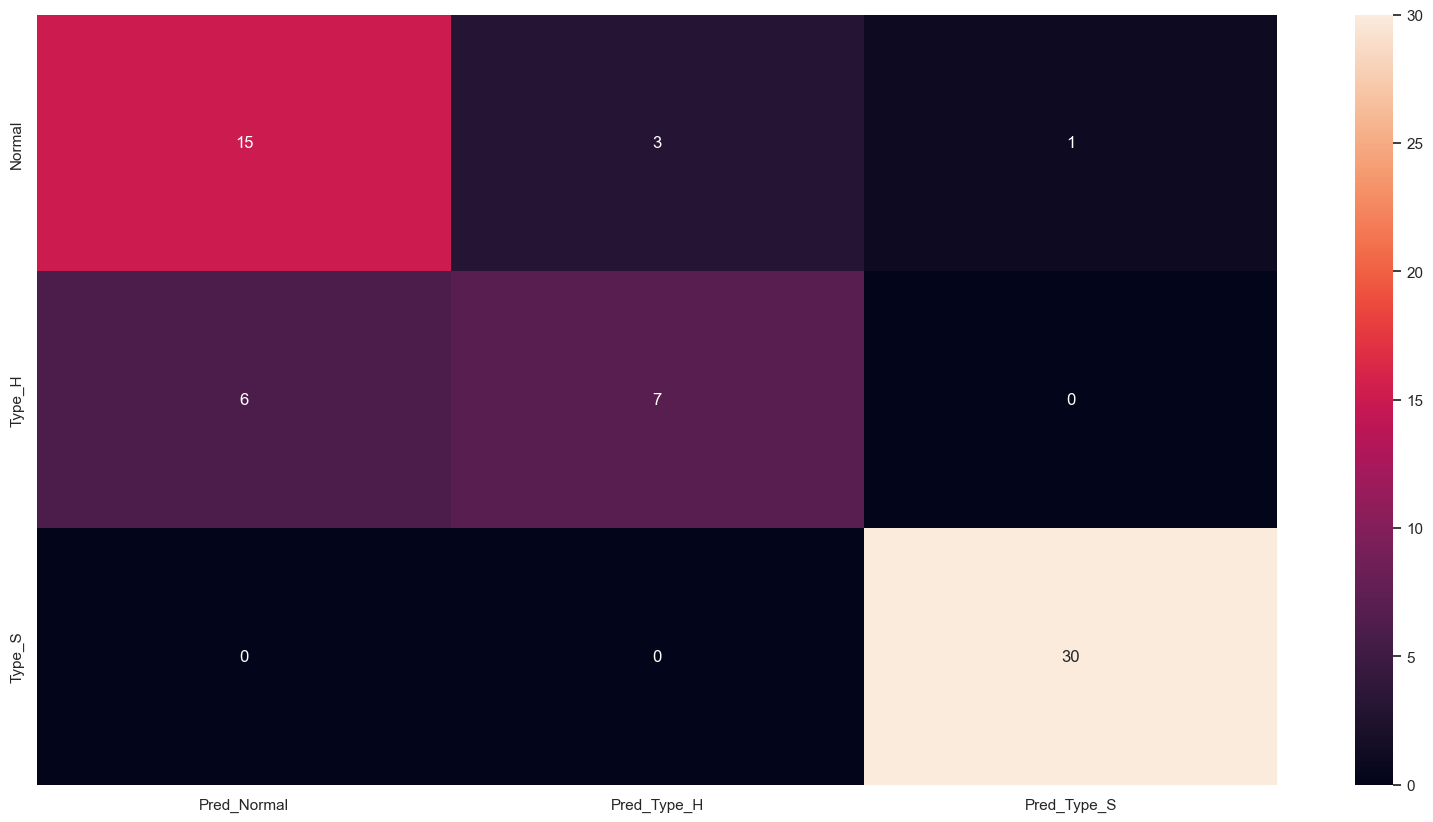

In [154]:
#Plotting heatmap of confusion matrix for testing dataset
sns.heatmap(con_test_df,annot=True)

#### Observations:
##### for Normal class, 15 values which are actually Normal are predicted as Normal.
##### for Type_H class, 7 values which are actually Type_H are predicted as Type_H.
##### for Type_S class, 30 values which are actually Type_S are predicted as Type_S.

In [155]:
#Printing the classification report for testing dataset
class_report_test = classification_report(Y_test, Y_test_pred)
print(class_report_test)

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.70      0.54      0.61        13
           2       0.97      1.00      0.98        30

    accuracy                           0.84        62
   macro avg       0.79      0.78      0.78        62
weighted avg       0.83      0.84      0.83        62



### PERFORMANCE IMPROVEMENT

In [156]:
#defining the value of k
k = np.arange(1,20,2)

In [157]:
#Checking the accuracy of testing dataset for different values of k
for i in k:
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train_scaled, Y_train)
    knn_model.predict(X_test_scaled)
    print("Training Accuracy at k value=",i,"is",knn_model.score(X_train_scaled,Y_train))
    print("Testing Accuracy at k value=",i,"is",knn_model.score(X_test_scaled,Y_test))

Training Accuracy at k value= 1 is 1.0
Testing Accuracy at k value= 1 is 0.7741935483870968
Training Accuracy at k value= 3 is 0.8991935483870968
Testing Accuracy at k value= 3 is 0.7258064516129032
Training Accuracy at k value= 5 is 0.8669354838709677
Testing Accuracy at k value= 5 is 0.8387096774193549
Training Accuracy at k value= 7 is 0.8588709677419355
Testing Accuracy at k value= 7 is 0.7903225806451613
Training Accuracy at k value= 9 is 0.8225806451612904
Testing Accuracy at k value= 9 is 0.8064516129032258
Training Accuracy at k value= 11 is 0.8104838709677419
Testing Accuracy at k value= 11 is 0.8548387096774194
Training Accuracy at k value= 13 is 0.8225806451612904
Testing Accuracy at k value= 13 is 0.8225806451612904
Training Accuracy at k value= 15 is 0.8225806451612904
Testing Accuracy at k value= 15 is 0.8548387096774194
Training Accuracy at k value= 17 is 0.8185483870967742
Testing Accuracy at k value= 17 is 0.8225806451612904
Training Accuracy at k value= 19 is 0.810483

In [158]:
#importing grid search to find the best parameter to improve the model performance
from sklearn.model_selection import GridSearchCV

In [159]:
#Developing the model
model = KNeighborsClassifier()

In [160]:
#Defing the range of parameter
leaf_size=list(range(1,100))
n_neighbors = list(range(1, 21, 2))
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [161]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric,leaf_size=leaf_size)
grid_search = GridSearchCV(estimator=knn_model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, Y_train)

In [162]:
grid_result.best_score_

0.8141666666666667

In [163]:
#Finding the best values for the parameters
grid_result.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'distance'}

#### Observation - Best values of the parameter to improve the model performance is Leaf_size = 1, metric = euclidean, n_neighbors=7 , weights = distance.

In [164]:
#Developing the model with the best parameter values obtained
model2 = KNeighborsClassifier(leaf_size=1,metric='euclidean',n_neighbors=7,weights='distance')

In [165]:
#Training the model
model2.fit(X_train_scaled,Y_train)

KNeighborsClassifier(leaf_size=1, metric='euclidean', n_neighbors=7,
                     weights='distance')

In [166]:
#Predict the values of testing dataset
Y_test_pred_improved=model2.predict(X_test_scaled)

In [167]:
#Checking the accuracy of testing dataset
model2.score(X_test_scaled,Y_test)

0.8064516129032258

In [168]:
cls_report_test= classification_report(Y_test,Y_test_pred_improved)
print(cls_report_test)  

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        19
           1       0.71      0.38      0.50        13
           2       0.94      1.00      0.97        30

    accuracy                           0.81        62
   macro avg       0.77      0.72      0.73        62
weighted avg       0.80      0.81      0.79        62



In [171]:
#Checking the accuracy of the model at k =5
model_5 = KNeighborsClassifier(n_neighbors=5)

In [172]:
model_5.fit(X_train_scaled,Y_train)

KNeighborsClassifier()

In [173]:
model_5.score(X_train_scaled,Y_train)

0.8669354838709677

In [174]:
model_5.predict(X_test_scaled)

array([2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 1, 0, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0])

In [175]:
X_test_scaled[0]

array([ 1.82551791,  1.2654434 ,  0.95922624,  1.64199996, -0.64095115,
       -0.63054556])

In [176]:
model_5.predict([X_test_scaled[0]])

array([2])

In [177]:
model_5.score(X_test_scaled,Y_test)

0.8387096774193549

#### Observation - Accuracy of the model at k=7 is 80.64%, but at k=5, accuracy of the model increases to 83.87%. So the value of k contributed most to improve the performance of the model.

In [178]:
import bz2,pickle
file = bz2.BZ2File('modelForPrediction.pkl','wb')
pickle.dump(model_5,file)
file.close()

### PART B

### DATA UNDERSTANDING AND PREPARATION

In [26]:
#Loading the necessary libraries for solving the problems at hand
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from scipy import stats
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

In [27]:
df1 = pd.read_csv('Data1.csv')
df2 = pd.read_csv('Data2.csv')

In [28]:
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [29]:
df1.shape

(5000, 8)

#### Observation - we have 8 columns and 5000 rows

In [30]:
#checking sample 5 records
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [31]:
df2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [32]:
df2.shape

(5000, 7)

#### Observation - we have 7 columns and 5000 rows

In [33]:
#checking sample 5 records
df2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [34]:
#Merging the dataset
df=df1.merge(df2,left_on='ID',right_on='ID') #id is common in both dataframe

In [35]:
df.shape

(5000, 14)

#### Observation - Merged Dataframe has 14 columns and 5000 rows 

In [36]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [37]:
#Checking the datatypes
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [38]:
#Changing datatypes of categorical features
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in col:
    df[i]=df[i].astype('category')

In [39]:
#Checking the datatypes after above changes
df.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

#### Observation - we can see all categorical columns datatypes are changed

In [40]:
#Checking the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.7 KB


#### Observation - Target variable 'Loanoncard' seems to have a few missing records.

In [41]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [42]:
#dropping the missing values as they are very less
df.dropna(axis=0,inplace=True)

In [43]:
df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

#### Observation - All missing values are dropped now.

In [44]:
#ID column is not useful in model building so dropping that feature
df.drop('ID',axis=1,inplace=True)

In [45]:
df.describe()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759
std,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758
min,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000
50%,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000
75%,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000
max,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000


#### Observations:
##### Mean and Median of Age, customer since column is nearly equal, so there wont be any skewness.

##### Mean is greater than Median in highestspend and MonthlyAverageSpend. So, Positive skewness will exist.

##### We can see high fluctuation in mortage column. 50% of data has zero values but maximum value is 635. This is hugely affected by outliers.

#### Distribution and outlier analysis of numerical variables

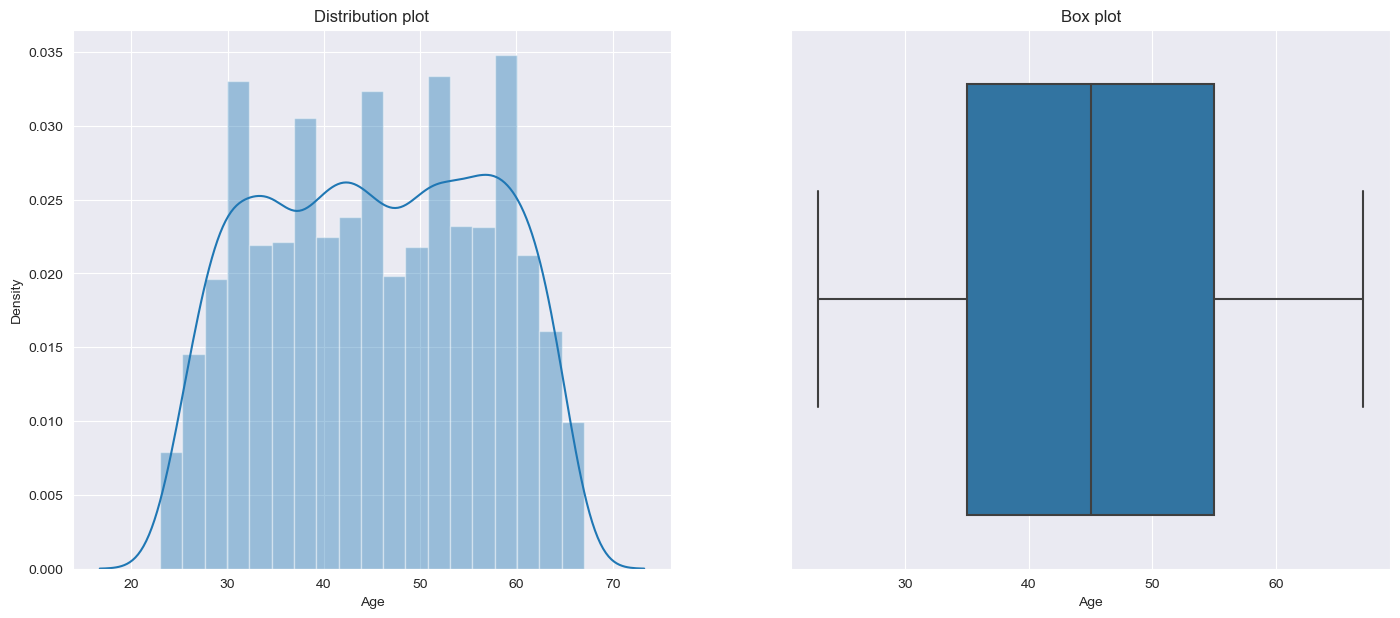

 Total Number of outliers in Age: 0


In [50]:
#Age
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Age', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['Age'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['Age'],25),np.percentile(df['Age'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Age'] if i < lower or i > upper]
print('{} Total Number of outliers in Age: {}'.format('\033[1m',len(Outliers)))

#### Observations:

There is normality maintained in age column. Center area is little wider.

People with age between 35 to 65 are more

We have no outliers in this column

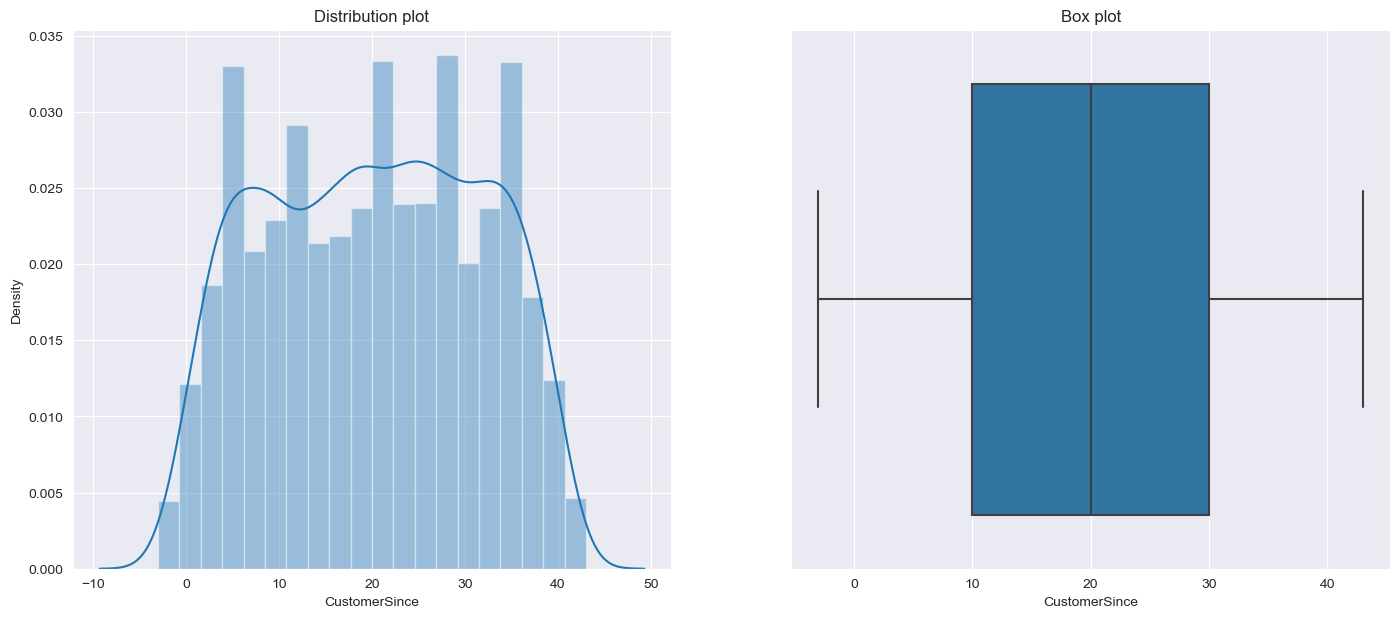

 Total Number of outliers in CustomerSince: 0


In [51]:
#CustomerSince
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'CustomerSince', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['CustomerSince'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['CustomerSince'],25),np.percentile(df['CustomerSince'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['CustomerSince'] if i < lower or i > upper]
print('{} Total Number of outliers in CustomerSince: {}'.format('\033[1m',len(Outliers)))


#### Observations:

Most of the people became customer of bank between 10 to 30. Here the units are masked

We have no outliers

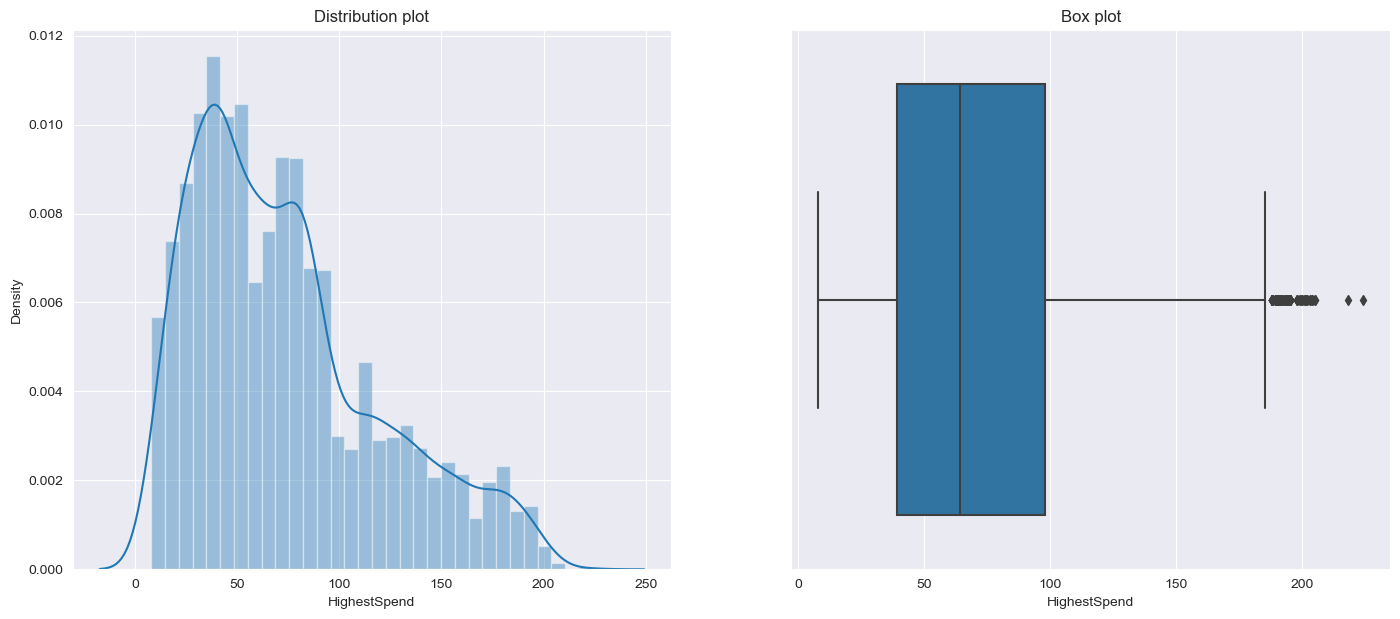

 Total Number of outliers in HighestSpend: 96


In [52]:
#HighestSpend
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'HighestSpend', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['HighestSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['HighestSpend'],25),np.percentile(df['HighestSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['HighestSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in HighestSpend: {}'.format('\033[1m',len(Outliers)))

#### Observations:

We can see positive skewness in the data

In one transaction highest spend amount is between 45 to 100. Here the units are masked

We can see 96 Outliers. Few customers spent more than 200 as well

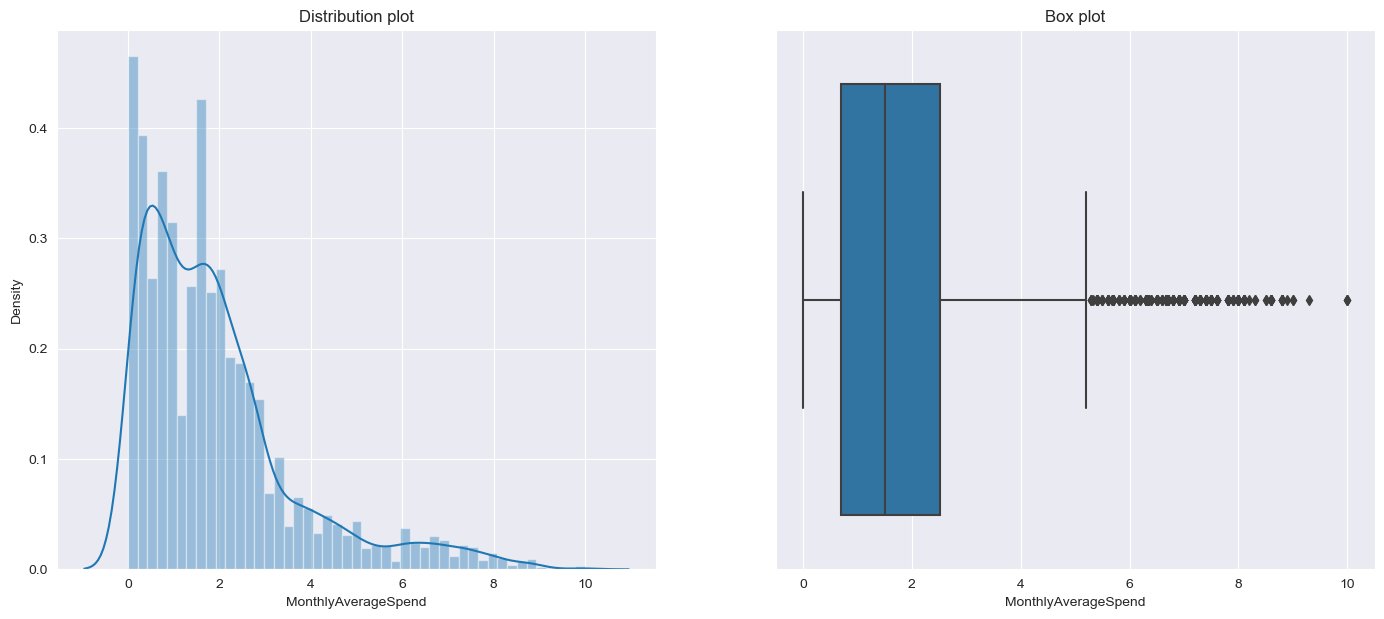

 Total Number of outliers in MonthlyAverageSpend: 324


In [54]:
#MonthlyAverageSpend
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'MonthlyAverageSpend', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['MonthlyAverageSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['MonthlyAverageSpend'],25),np.percentile(df['MonthlyAverageSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['MonthlyAverageSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in MonthlyAverageSpend: {}'.format('\033[1m',len(Outliers)))

#### Observations:

We can see huge positive skewness in the data

Monthly average spend of the customer are mostly between 1 to 3 (Units are masked)

There is more number of outliers. This tells us some customers spent huge amount as well.

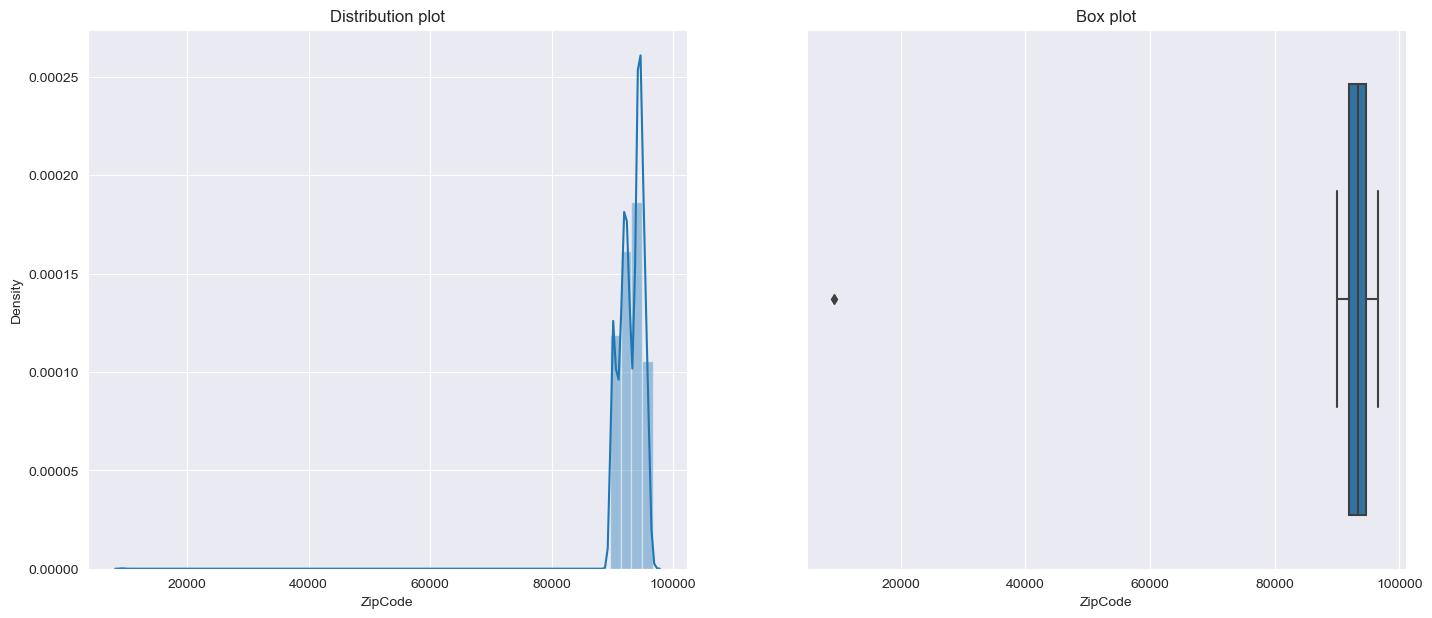

 Total Number of outliers in ZipCode: 1


In [55]:
#ZipCode
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'ZipCode', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['ZipCode'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['ZipCode'],25),np.percentile(df['ZipCode'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['ZipCode'] if i < lower or i > upper]
print('{} Total Number of outliers in ZipCode: {}'.format('\033[1m',len(Outliers)))

#### Observations:

Most of the zipcodes are appeared once.

There is no proper distribution

This column does not add value to the model. We will drop during model building.

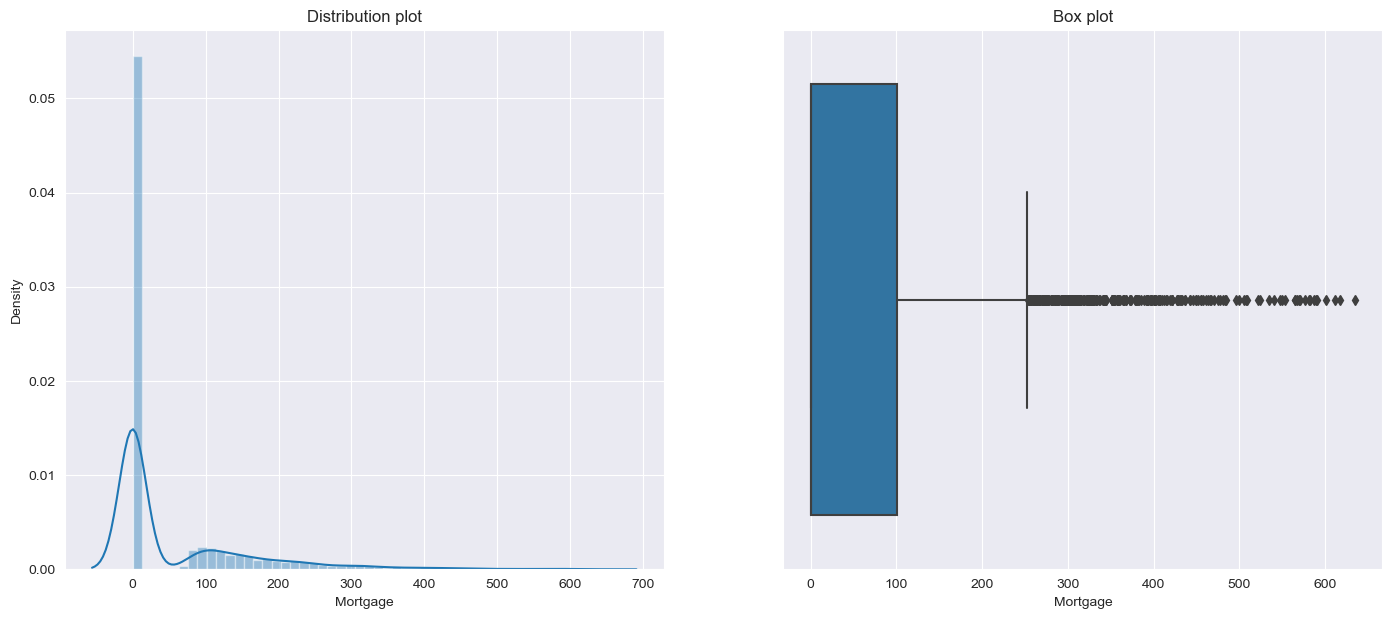

 Total Number of outliers in Mortgage: 291


In [56]:
#Mortgage
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Mortgage', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['Mortgage'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['Mortgage'],25),np.percentile(df['Mortgage'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Mortgage'] if i < lower or i > upper]
print('{} Total Number of outliers in Mortgage: {}'.format('\033[1m',len(Outliers)))

#### Observations:

Most of cases we have zero as value this tell most of the cutomer doest have mortage.

We can see there is no proper distribution.

### Distribution of categorical variables

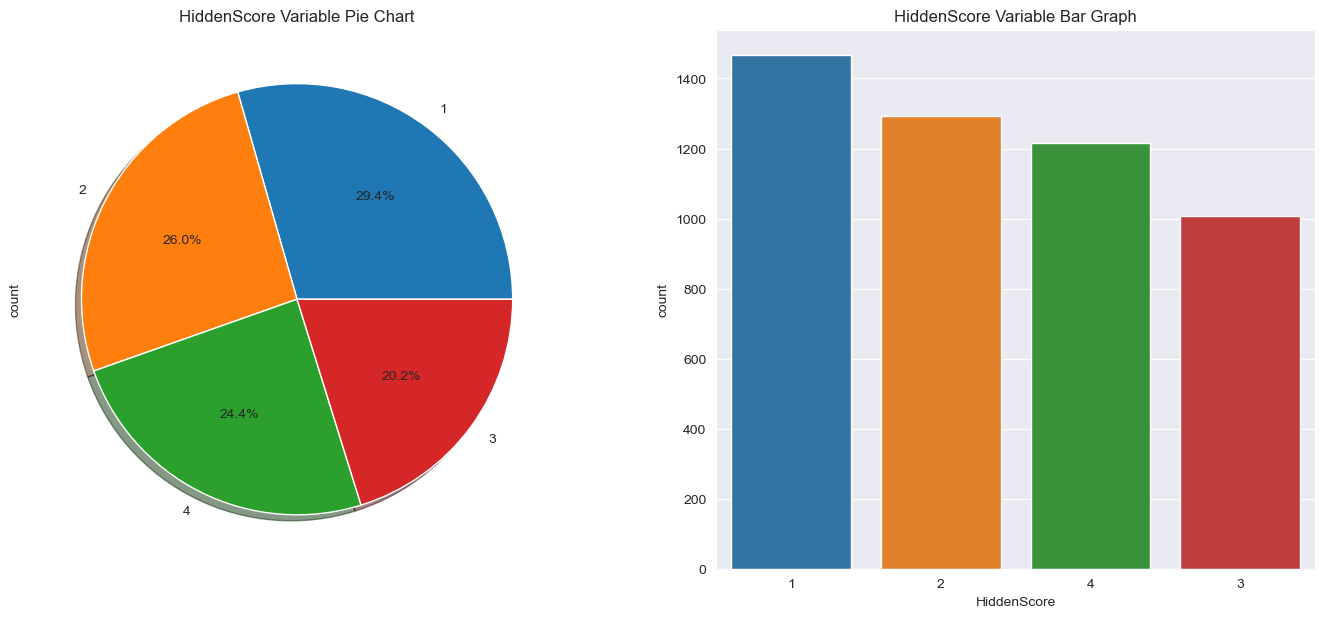

In [58]:
#HiddenScore
f, axes = plt.subplots(1, 2, figsize=(17, 7))
df['HiddenScore'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], shadow=True)
sns.countplot(data=df, x='HiddenScore', ax=axes[1], order=[1, 2, 4, 3])
axes[0].set_title('HiddenScore Variable Pie Chart')
axes[1].set_title('HiddenScore Variable Bar Graph')

plt.show()

#### Observation - We can see nearly equal distribution of each category

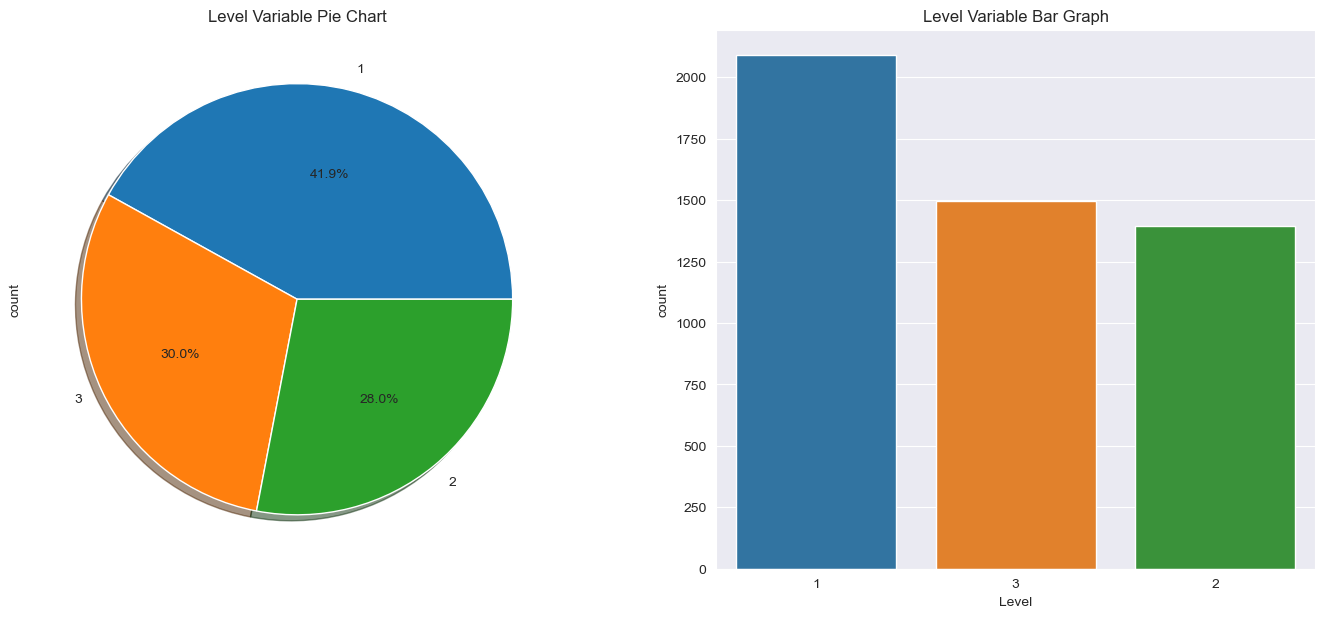

In [60]:
#Level
f, axes = plt.subplots(1, 2, figsize=(17, 7))
df['Level'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], shadow=True)
sns.countplot(data=df, x='Level', ax=axes[1], order=[1, 3, 2])
axes[0].set_title('Level Variable Pie Chart')
axes[1].set_title('Level Variable Bar Graph')
plt.show()

#### Observations:

Level 2 and 3 has nearly equal distribution

Level 1 customers are more compared to others

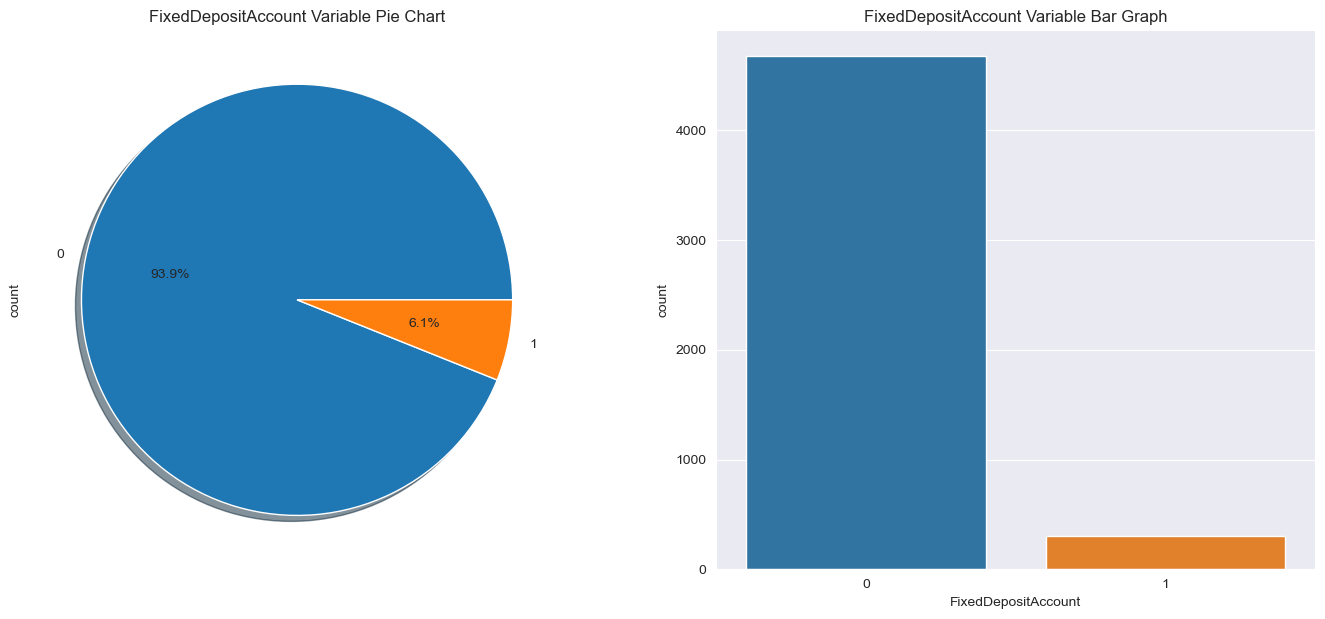

In [61]:
#FixedDepositAccount
f, axes = plt.subplots(1, 2, figsize=(17, 7))
df['FixedDepositAccount'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], shadow=True)
sns.countplot(data=df, x='FixedDepositAccount', ax=axes[1])
axes[0].set_title('FixedDepositAccount Variable Pie Chart')
axes[1].set_title('FixedDepositAccount Variable Bar Graph')
plt.show()

#### Observation: We can see 93.9% of customers do not have fixed deposit account.

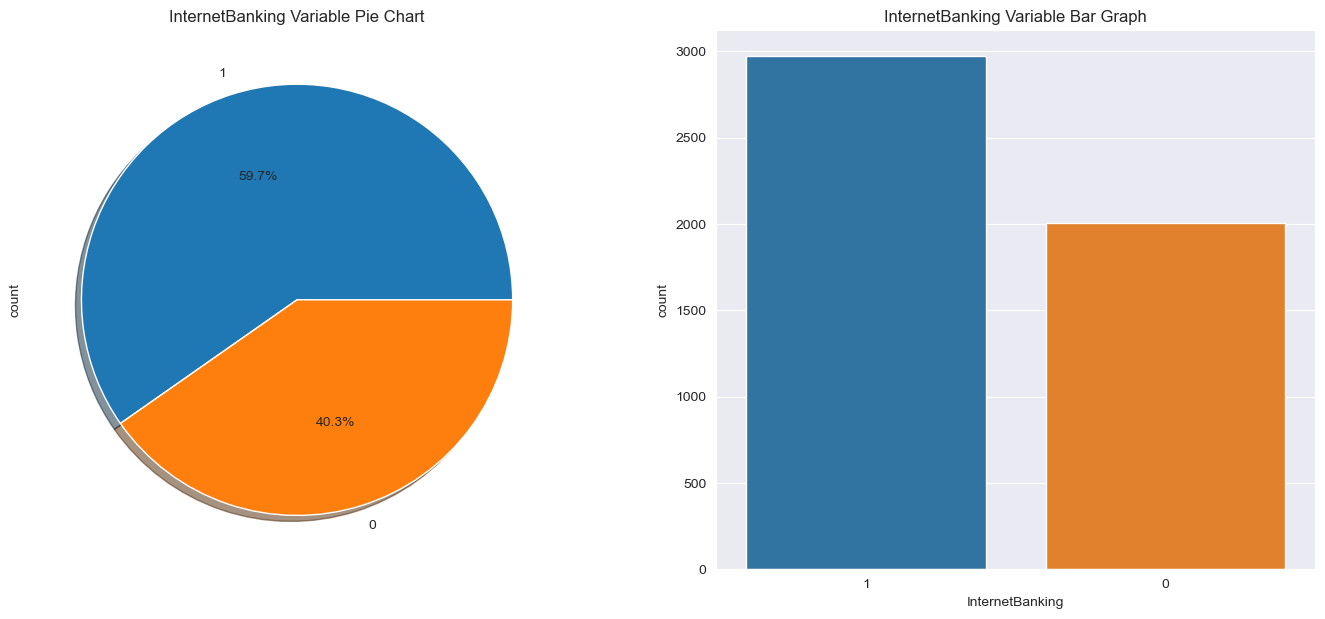

In [62]:
#InternetBanking
f, axes = plt.subplots(1, 2, figsize=(17, 7))
df['InternetBanking'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], shadow=True)
sns.countplot(data=df, x='InternetBanking', ax=axes[1], order=[1, 0])
axes[0].set_title('InternetBanking Variable Pie Chart')
axes[1].set_title('InternetBanking Variable Bar Graph')
plt.show()

#### Observation- Around 60 % of people use internet banking.

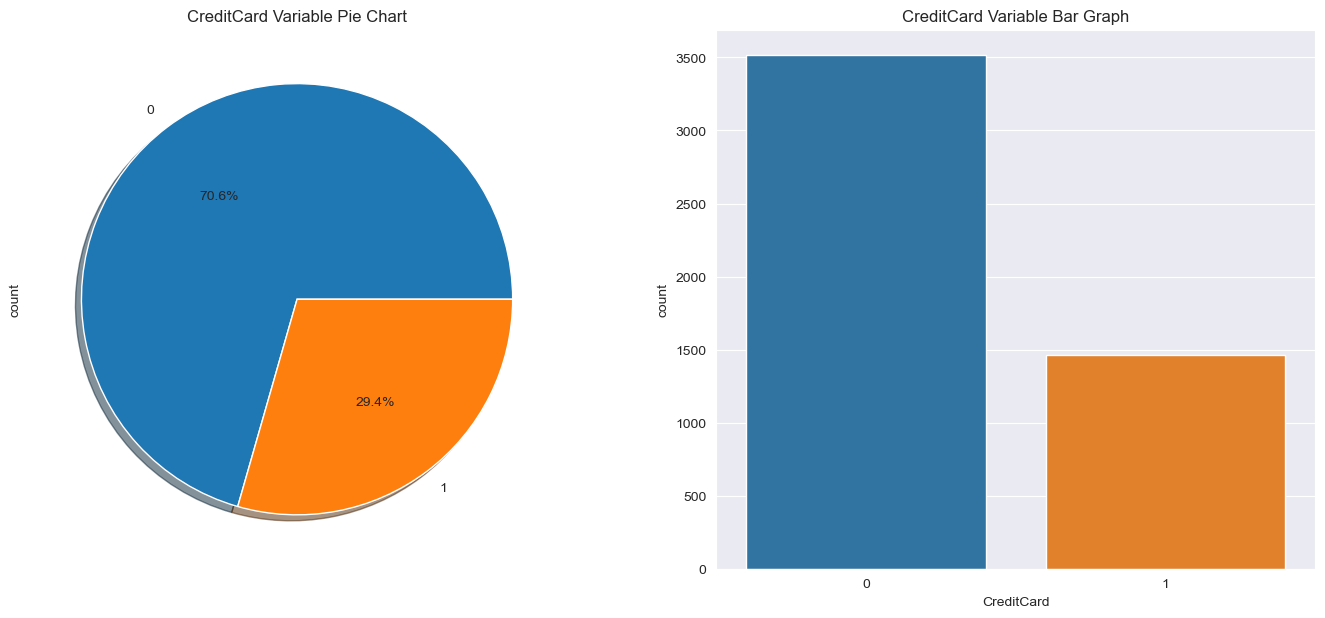

In [64]:
#CreditCard
f, axes = plt.subplots(1, 2, figsize=(17, 7))
df['CreditCard'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], shadow=True)
sns.countplot(x='CreditCard', data=df, ax=axes[1], order=[0, 1])
axes[0].set_title('CreditCard Variable Pie Chart')
axes[1].set_title('CreditCard Variable Bar Graph')
plt.show()

#### Observation- Around 70% of people use bank's credit card.

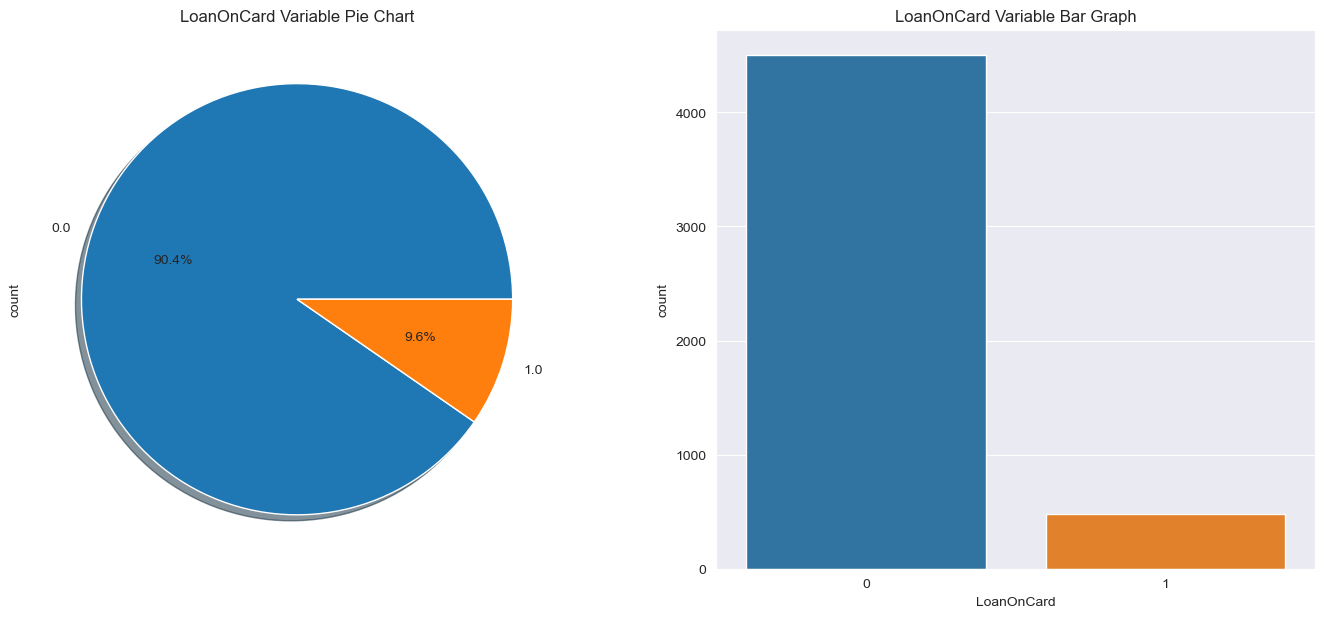

In [66]:
#LoanOnCard
f, axes = plt.subplots(1, 2, figsize=(17, 7))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], shadow=True)
sns.countplot(x='LoanOnCard', data=df, ax=axes[1], order=[0, 1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

#### Observation- we can see 90% of people do not have a loan on their credit cards.

In [68]:
col=['HighestSpend','MonthlyAverageSpend','Mortgage']

In [69]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in HighestSpend Before Imputing : 96


 Mean of HighestSpend is 71


 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


 Mean of MonthlyAverageSpend is 1


 Total Number of outliers in MonthlyAverageSpend After Imputing : 0


 Total Number of outliers in Mortgage Before Imputing : 291


 Mean of Mortgage is 38


 Total Number of outliers in Mortgage After Imputing : 0




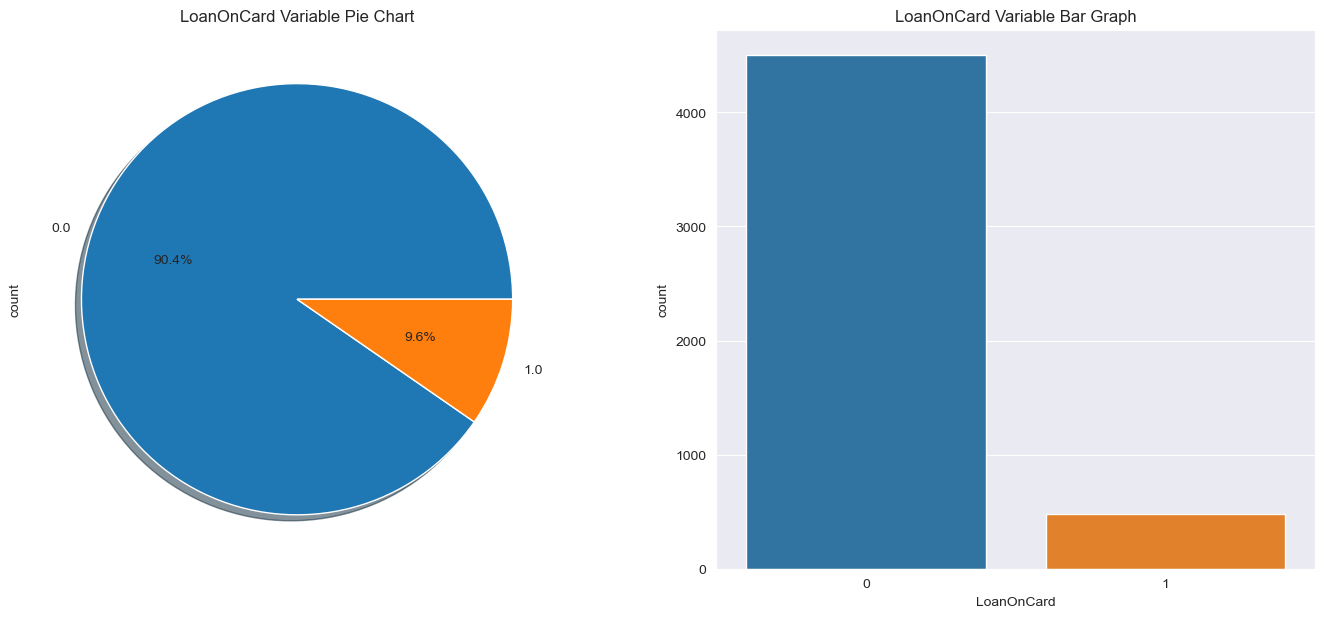

In [71]:
#Checking on Target Imbalance
f, axes = plt.subplots(1, 2, figsize=(17, 7))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], shadow=True)
sns.countplot(x='LoanOnCard', data=df, ax=axes[1], order=[0, 1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

#### Observations-

There is huge imbalance in target variable.

If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model.

A widely adopted technique for dealing with highly unbalanced datasets is called resampling

Two widely used resampling methods:

Undersampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

Oversampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class

Here we will use oversampling because undersampling may remove important information from the dataset.

In [72]:
# Arrange data into independent variables and dependent variables
X=df.drop(columns='LoanOnCard')
y=df['LoanOnCard'] #target

In [73]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [74]:
#Logistic Regression Model
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.908433734939759
Accuracy on Test data: 0.9036144578313253


#### Observations:
90% accuracy on training set and 90% accuracy on test set.

Here training set accuracy and testing accuracy are balanced when model is built without sampling also accuracy is good.

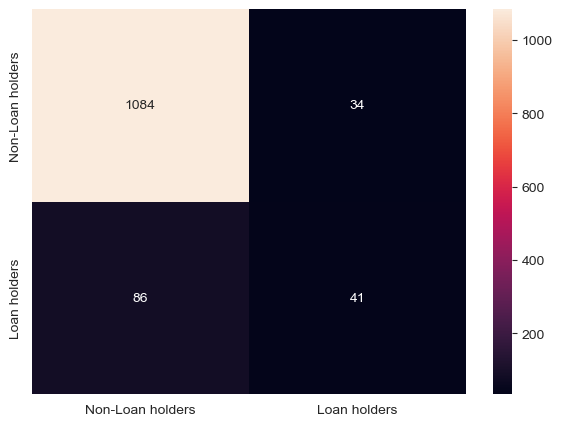

In [75]:
#Confusion Matrix
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [76]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1118
         1.0       0.55      0.32      0.41       127

    accuracy                           0.90      1245
   macro avg       0.74      0.65      0.68      1245
weighted avg       0.89      0.90      0.89      1245



#### Observations:

Here you can see model is poor in predicting class 1 compared to class 0

Accuracy is good but in this case we need to look on recall value

Here Recall tells that only 48% class 1 is predicted correctly from actual values

We dont have enough sample of class 1 to train the model.

We will do the sampling and check how recall values improves in this case.

In [77]:
#Here we are doing smote for all data
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(X,y)

In [78]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
LoanOnCard
0.0    4500
1.0     480
Name: count, dtype: int64


In [79]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
LoanOnCard
0.0    4500
1.0    4500
Name: count, dtype: int64


#### We can see that now the target is balanced after sampling.

In [80]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.25, random_state=10)

In [81]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8337777777777777
Accuracy on Test data: 0.8364444444444444


#### Here, both the accuracy are reduced after sampling. Let us check on the classification report.

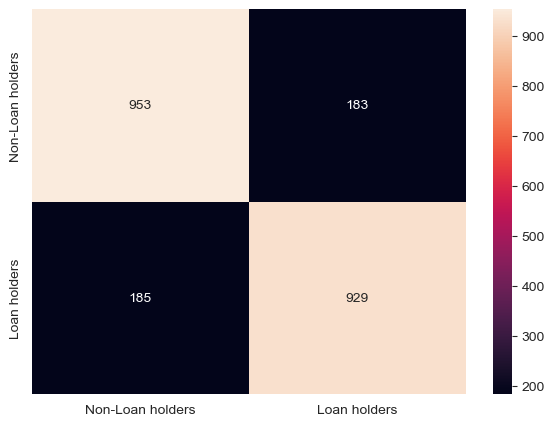

In [82]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [83]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1136
         1.0       0.84      0.83      0.83      1114

    accuracy                           0.84      2250
   macro avg       0.84      0.84      0.84      2250
weighted avg       0.84      0.84      0.84      2250



####

Now we can see recall value is improved after sampling.

So whenever we have imbalance target we will use sampling method to balance the data.

If we do smote on entire data it may leak information to validation data as well. We need to test the model with unseen information. So, we will do sampling only on training data.

We are doing smote only for training data.

In [84]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [85]:
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42)
x_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

In [86]:
logit = LogisticRegression()
logit.fit(x_train_res, y_train_res)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8406961178045516
Accuracy on Test data: 0.8152610441767069


We can see there is decrease in test accuracy.

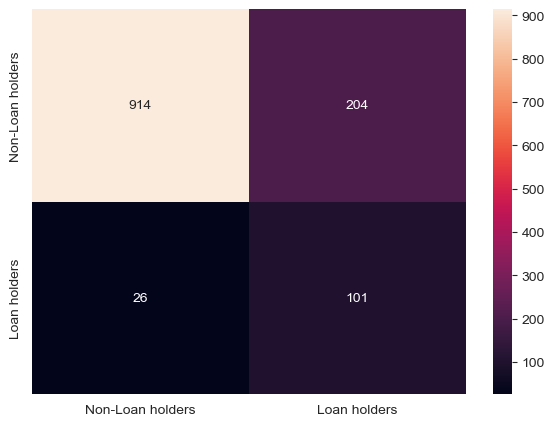

In [87]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [88]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.97      0.82      0.89      1118
         1.0       0.33      0.80      0.47       127

    accuracy                           0.82      1245
   macro avg       0.65      0.81      0.68      1245
weighted avg       0.91      0.82      0.85      1245



After doing sampling only on training data we can see difference in values

We are getting good recall value but the precision value is reduced

We will do sampling only on training data to check real performance of the model

In [89]:
#Naive Bayes Model
g_model = GaussianNB()
g_model.fit(x_train_res, y_train_res.ravel())
g_pred = g_model.predict(X_test)

print('Accuracy on Training data:',g_model.score(X_train, y_train) )
print('Accuracy on Test data:',g_model.score(X_test, y_test) )

Accuracy on Training data: 0.8674698795180723
Accuracy on Test data: 0.8570281124497992


#### Here accuracy in test data slightly less compared to training data.

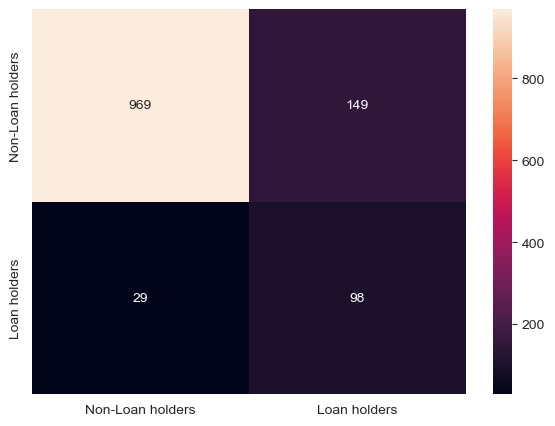

In [90]:
cm = confusion_matrix(y_test, g_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [91]:
print("classification  Matrix:\n",classification_report(y_test,g_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      1118
         1.0       0.40      0.77      0.52       127

    accuracy                           0.86      1245
   macro avg       0.68      0.82      0.72      1245
weighted avg       0.91      0.86      0.88      1245



Recall value is good for both the classes

Recall value for class 1 is less in naive bayes model compared to logistic regression.

In [92]:
#K-Fold CV for finding best model
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()

LR: 0.910241 (0.010319)
KNN: 0.902811 (0.012706)
NB: 0.906426 (0.014707)


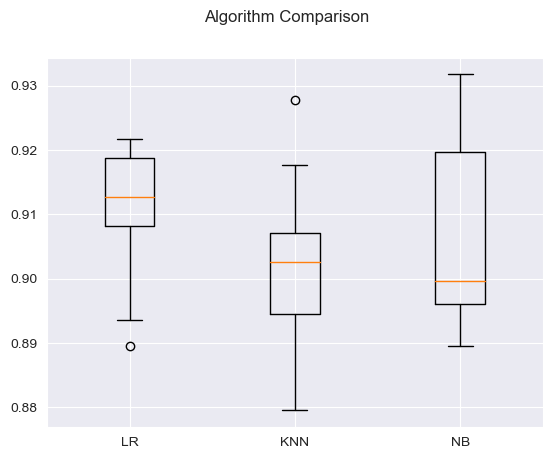

In [93]:
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Without doing any sampling using k-fold we are getiing good accuracy score in logistic regresssion.

Naive bayes performance is less compared to others.

As we are having imbalanced data we will use stratified k-fold to check the performance.

LR: 0.917068 (0.017111)
KNN: 0.903012 (0.005823)
NB: 0.906627 (0.015033)


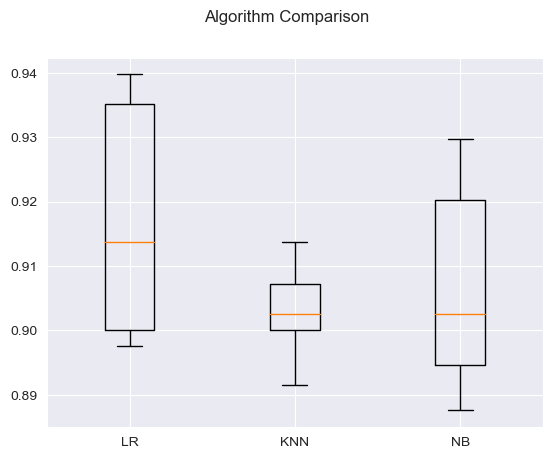

In [94]:
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Very slight improvement in accuracy

#### Conclusion:

We are selecting final model as logistic regression as it performs well in training and testing test.

Logistic Regression is not affected by overfitting and it is also has good recall value.

Logistic regression performed well in k-fold cross validation as well.

Deviation also less in logistic regression.

Sampling improved to predict minority classes as well.

Suggesting to collect data equally for both the classes.

Few customers does't have credit card but those customer having loan on card. This data error can be avoided.